In [1]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET

In [2]:
df = pd.read_csv("../data/Regions_cleaned.csv")
df.head()

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Under 5,5 to 9,10 to 14,15 to 19,20 to 24,...,15 to 24.9k,25 to 34.9k,35 to 49.9k,50 to 74.9k,75 to 99.9k,100 to 149.9k,150 to 199.9k,200k or more,Zipcode,isLab
0,0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,...,298,513,647,1117,529,945,245,61,35004,False
1,1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,...,318,293,353,562,299,407,67,26,35005,False
2,2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,...,117,104,154,176,124,194,51,7,35006,False
3,3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,...,670,462,1173,1854,1578,2224,473,254,35007,False
4,4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,...,1093,957,1056,1512,807,749,254,249,35010,False


In [3]:
df = df.drop(columns='Unnamed: 0')

## ANALYSIS

In [4]:
main_columns = ['GeographicAreaName','TotalPopulation','SexRatio(males per 100 females)', 'MedianAgeInYears']

age_class_columns = ['TotalPopulation','SexRatio(males per 100 females)', 'MedianAgeInYears', 'Under 5', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 59',
                    '60 to 64', '65 to 74', '75 to 84', '85 and Over']

household_columns = ['Less than 10k', '10 to 14.9k', '15 to 24.9k', '25 to 34.9k', '35 to 49.9k', '50 to 74.9k', '75 to 99.9k', 
                     '100 to 149.9k', '150 to 199.9k', '200k or more']

## MERCADO DISPONIVEL

In [5]:
soma_por_isLab = df.groupby('isLab')['TotalPopulation'].sum()
soma_por_isLab

isLab
False    324519368
True       3442907
Name: TotalPopulation, dtype: int64

In [6]:
# Fatia do mercado por população
(soma_por_isLab[1] / (soma_por_isLab[0] + soma_por_isLab[1])) * 100

/tmp/ipykernel_10412/3690469867.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (soma_por_isLab[1] / (soma_por_isLab[0] + soma_por_isLab[1])) * 100


1.0497875098591751

In [7]:
# Participação no mercado por Zipcode
print(f" Total de zipcode {len(df['Zipcode'].unique())}")
print(f" zipcode ocupados {df[df['isLab']==True].shape[0]} ")
print (f"{df[df['isLab']==True].shape[0] / len(df['Zipcode'].unique())*100}")

 Total de zipcode 32620
 zipcode ocupados 103 
0.3157572041692214


### DISTRIBUIÇÃO

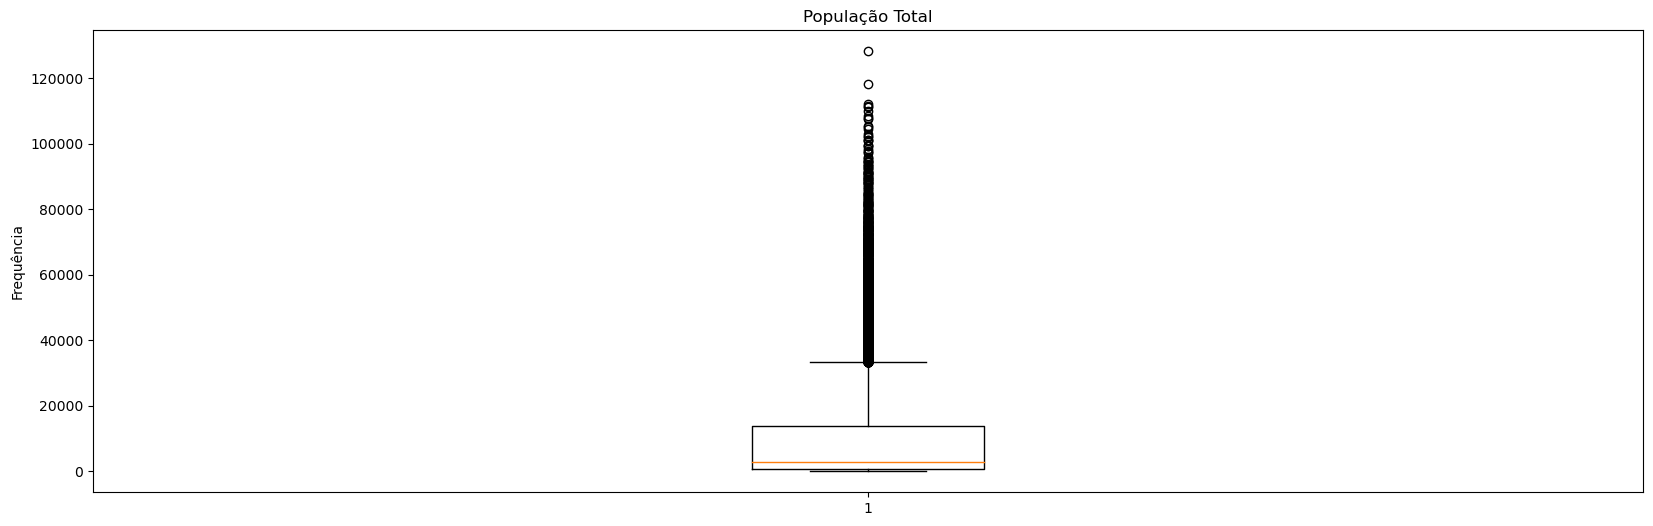

In [8]:
utils.boxplot(df=df['TotalPopulation'], title='População Total', y='Frequência')

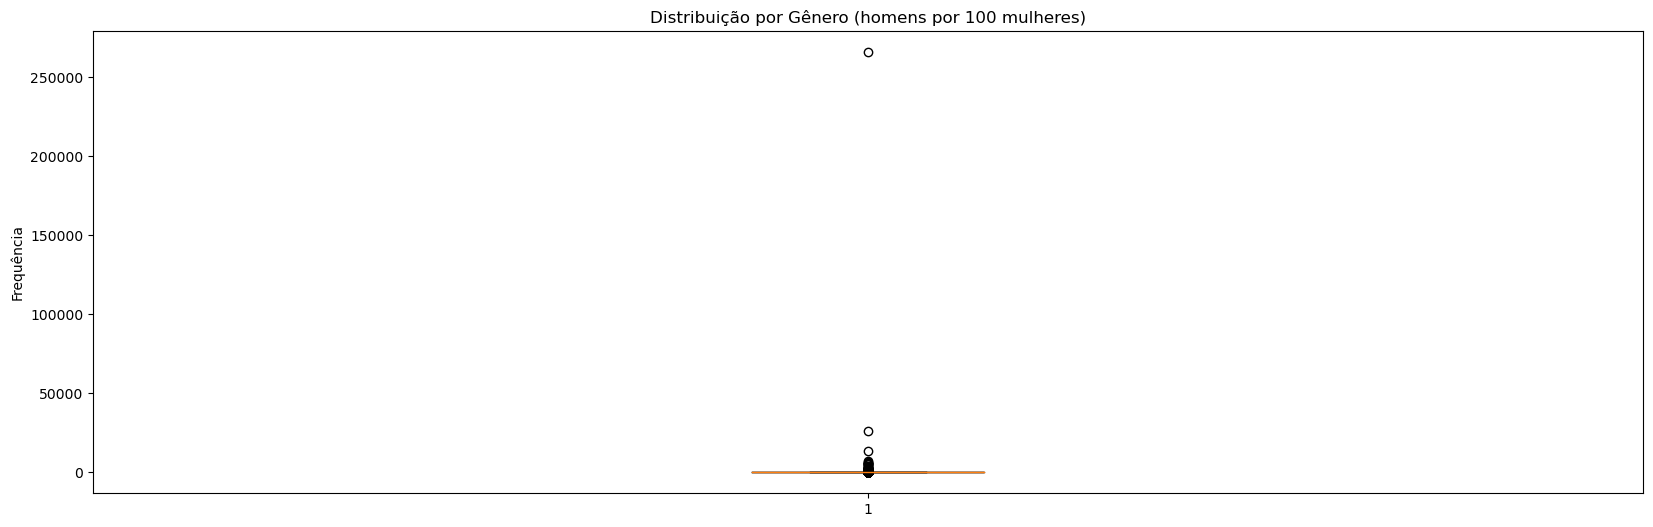

In [9]:
utils.boxplot(df=df['SexRatio(males per 100 females)'], title='Distribuição por Gênero (homens por 100 mulheres)', y='Frequência')

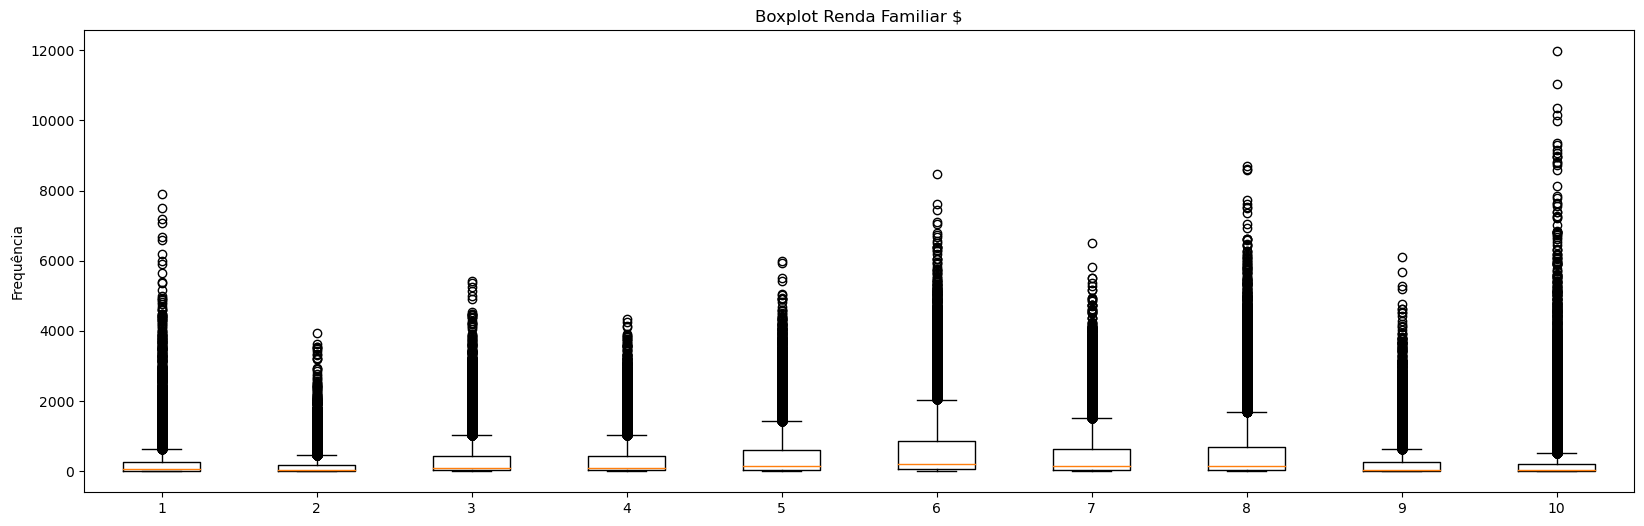

In [10]:
utils.boxplot(df=df[household_columns], title='Boxplot Renda Familiar $', y='Frequência')

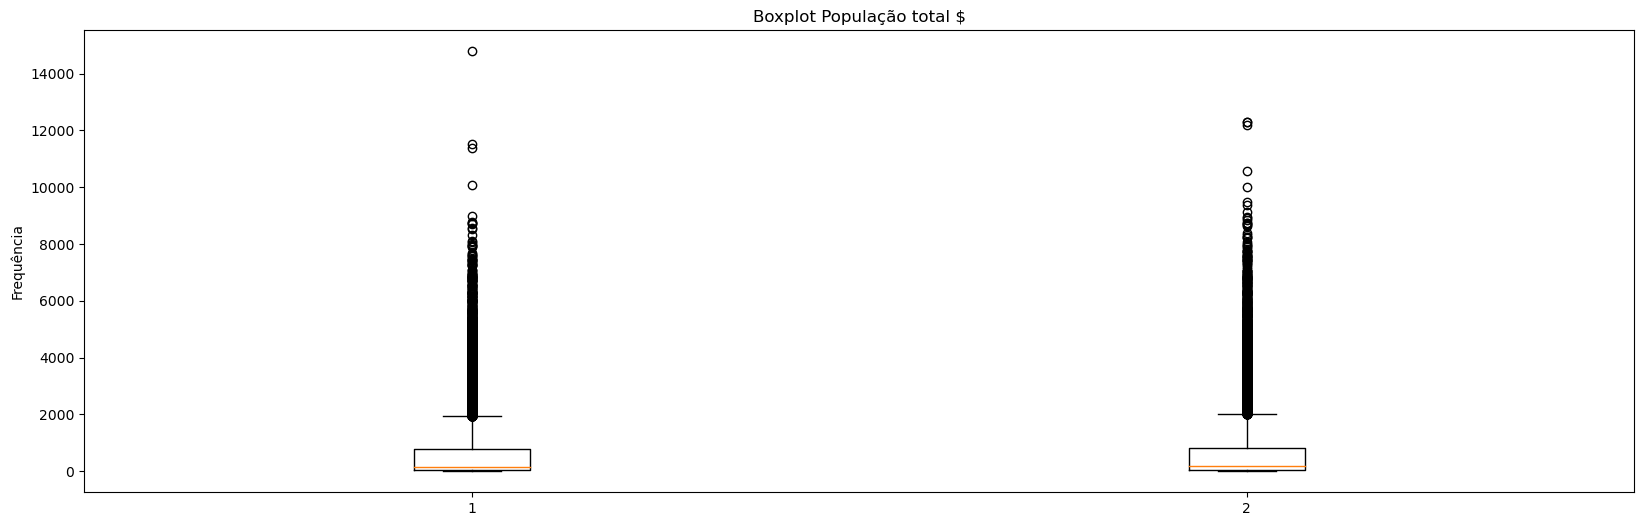

In [11]:
utils.boxplot(df=df[['5 to 9', '10 to 14']], title='Boxplot População total $', y='Frequência')

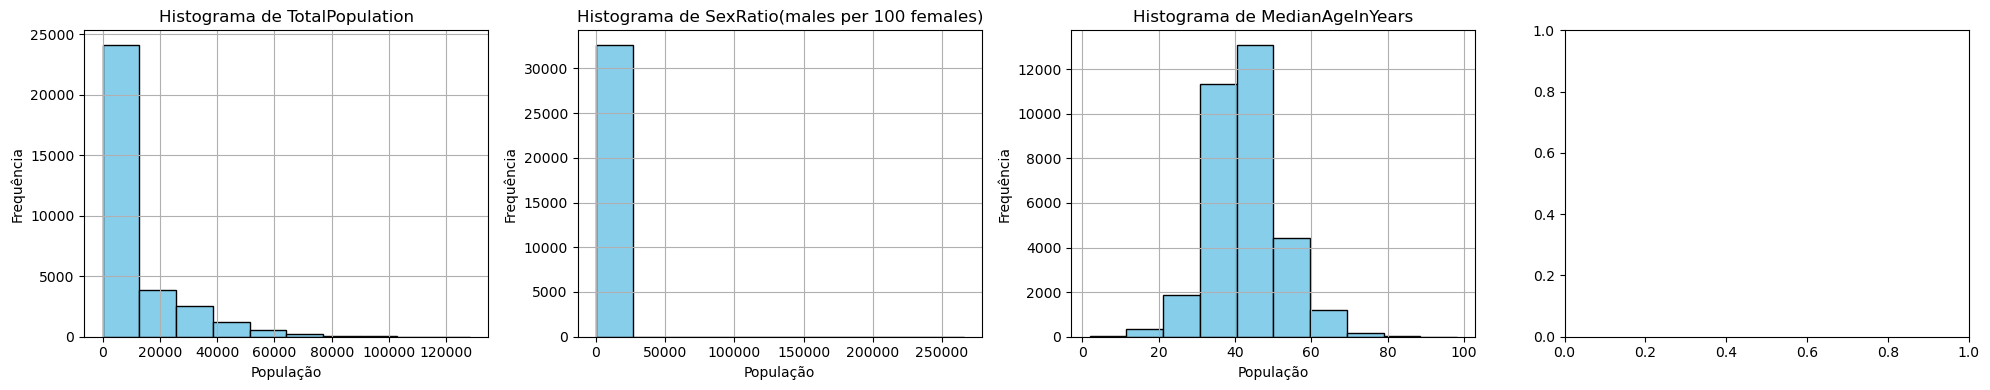

In [12]:
utils.histogram(df[[col for col in main_columns if col != 'GeographicAreaName']]) 

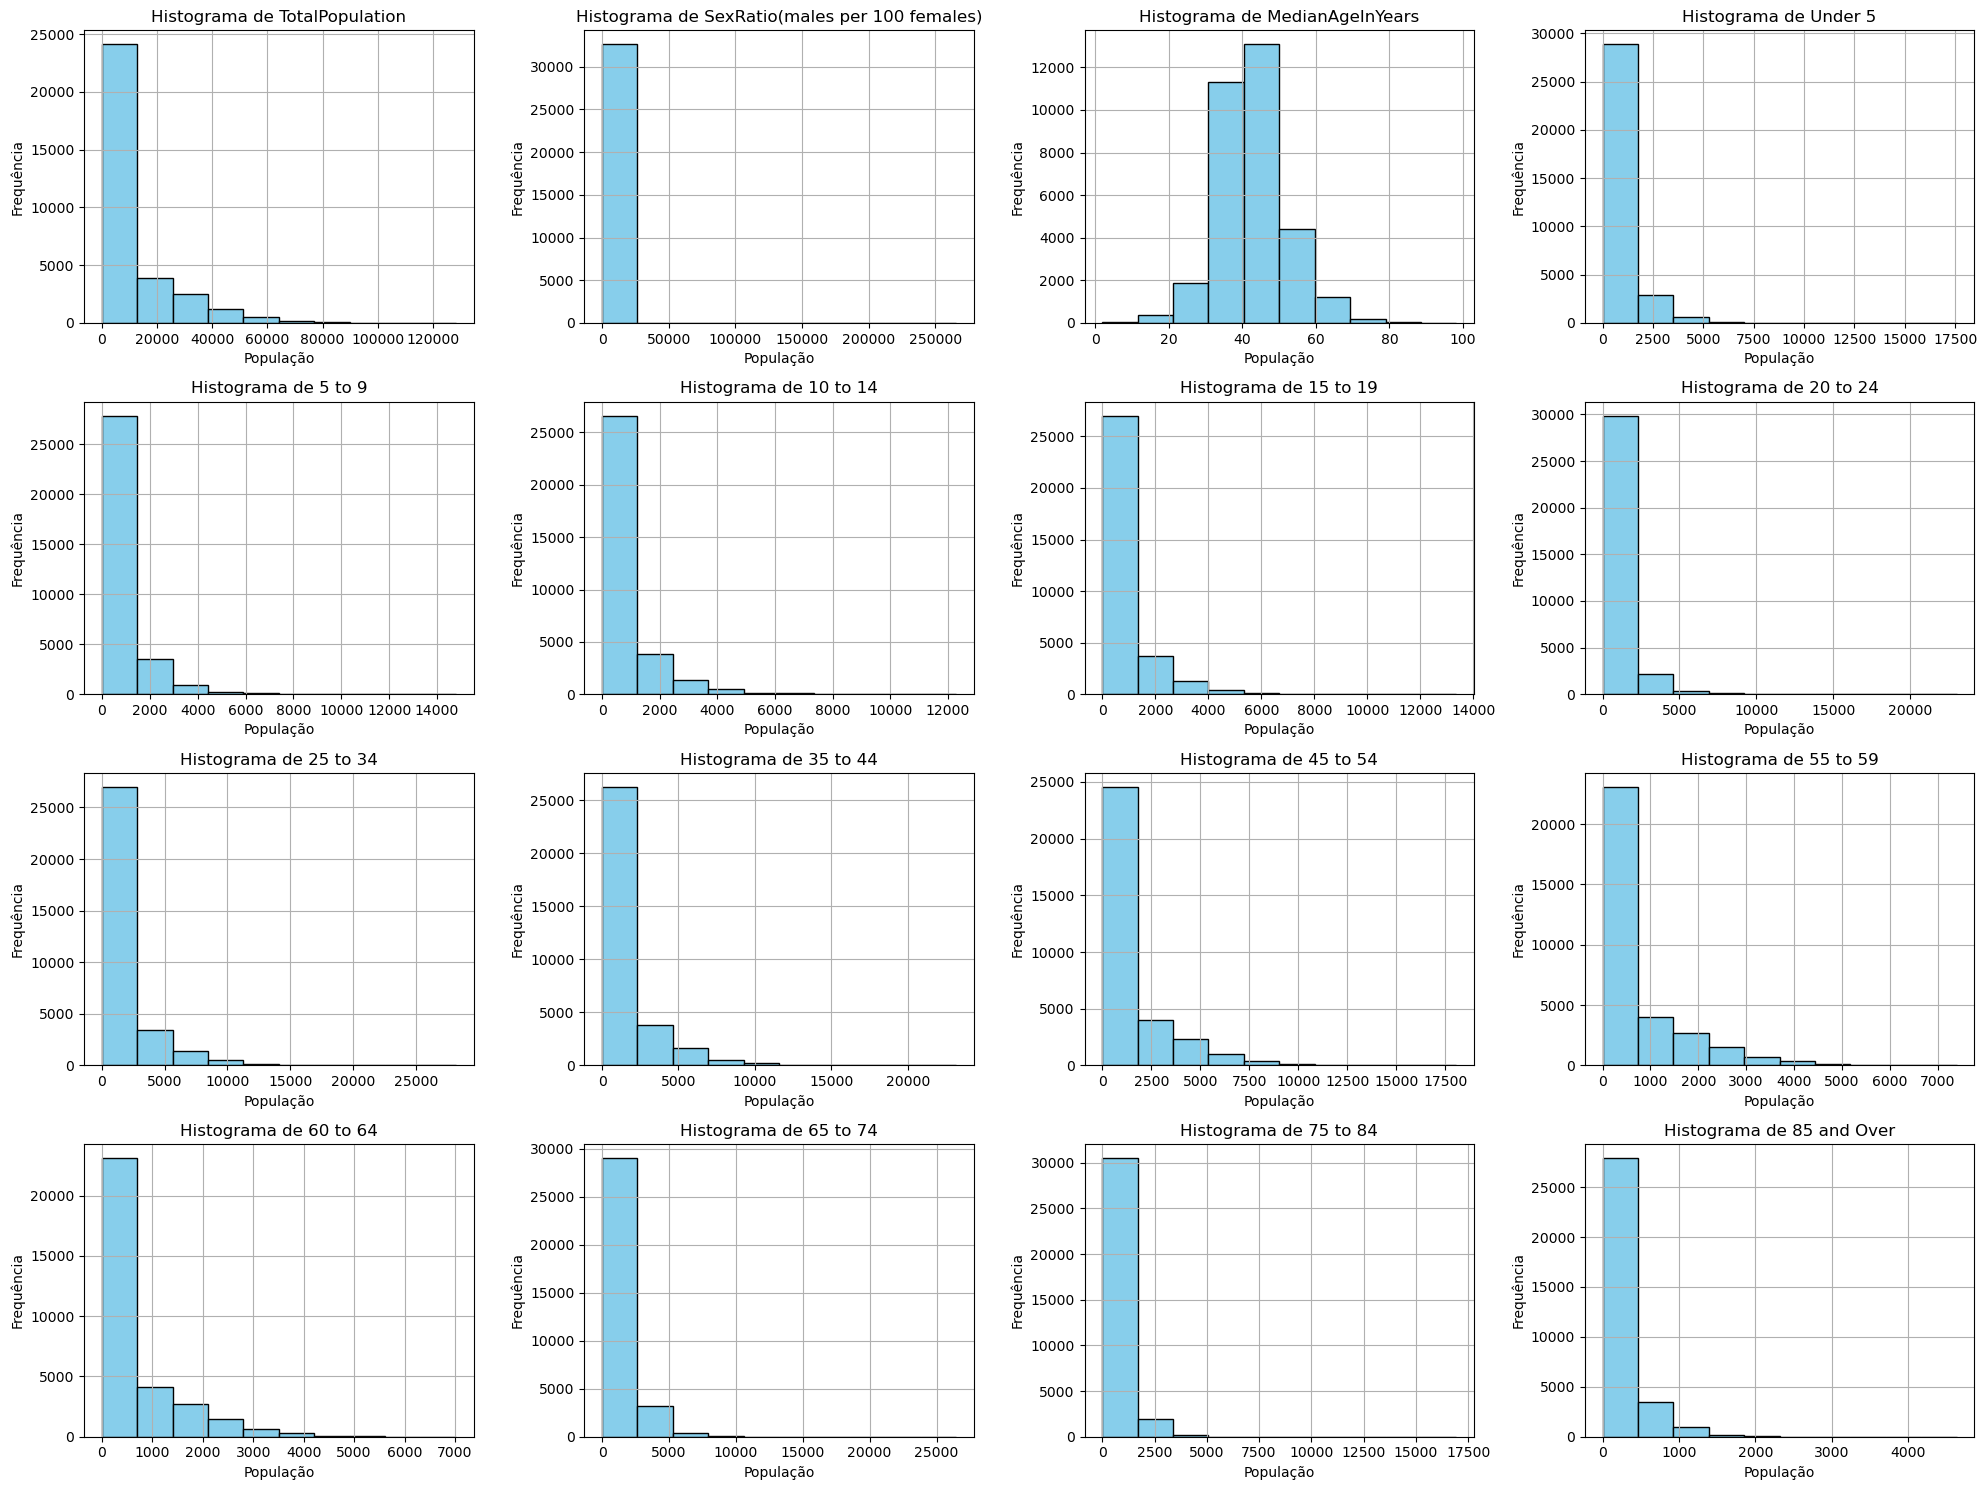

In [13]:
utils.histogram(df[age_class_columns])

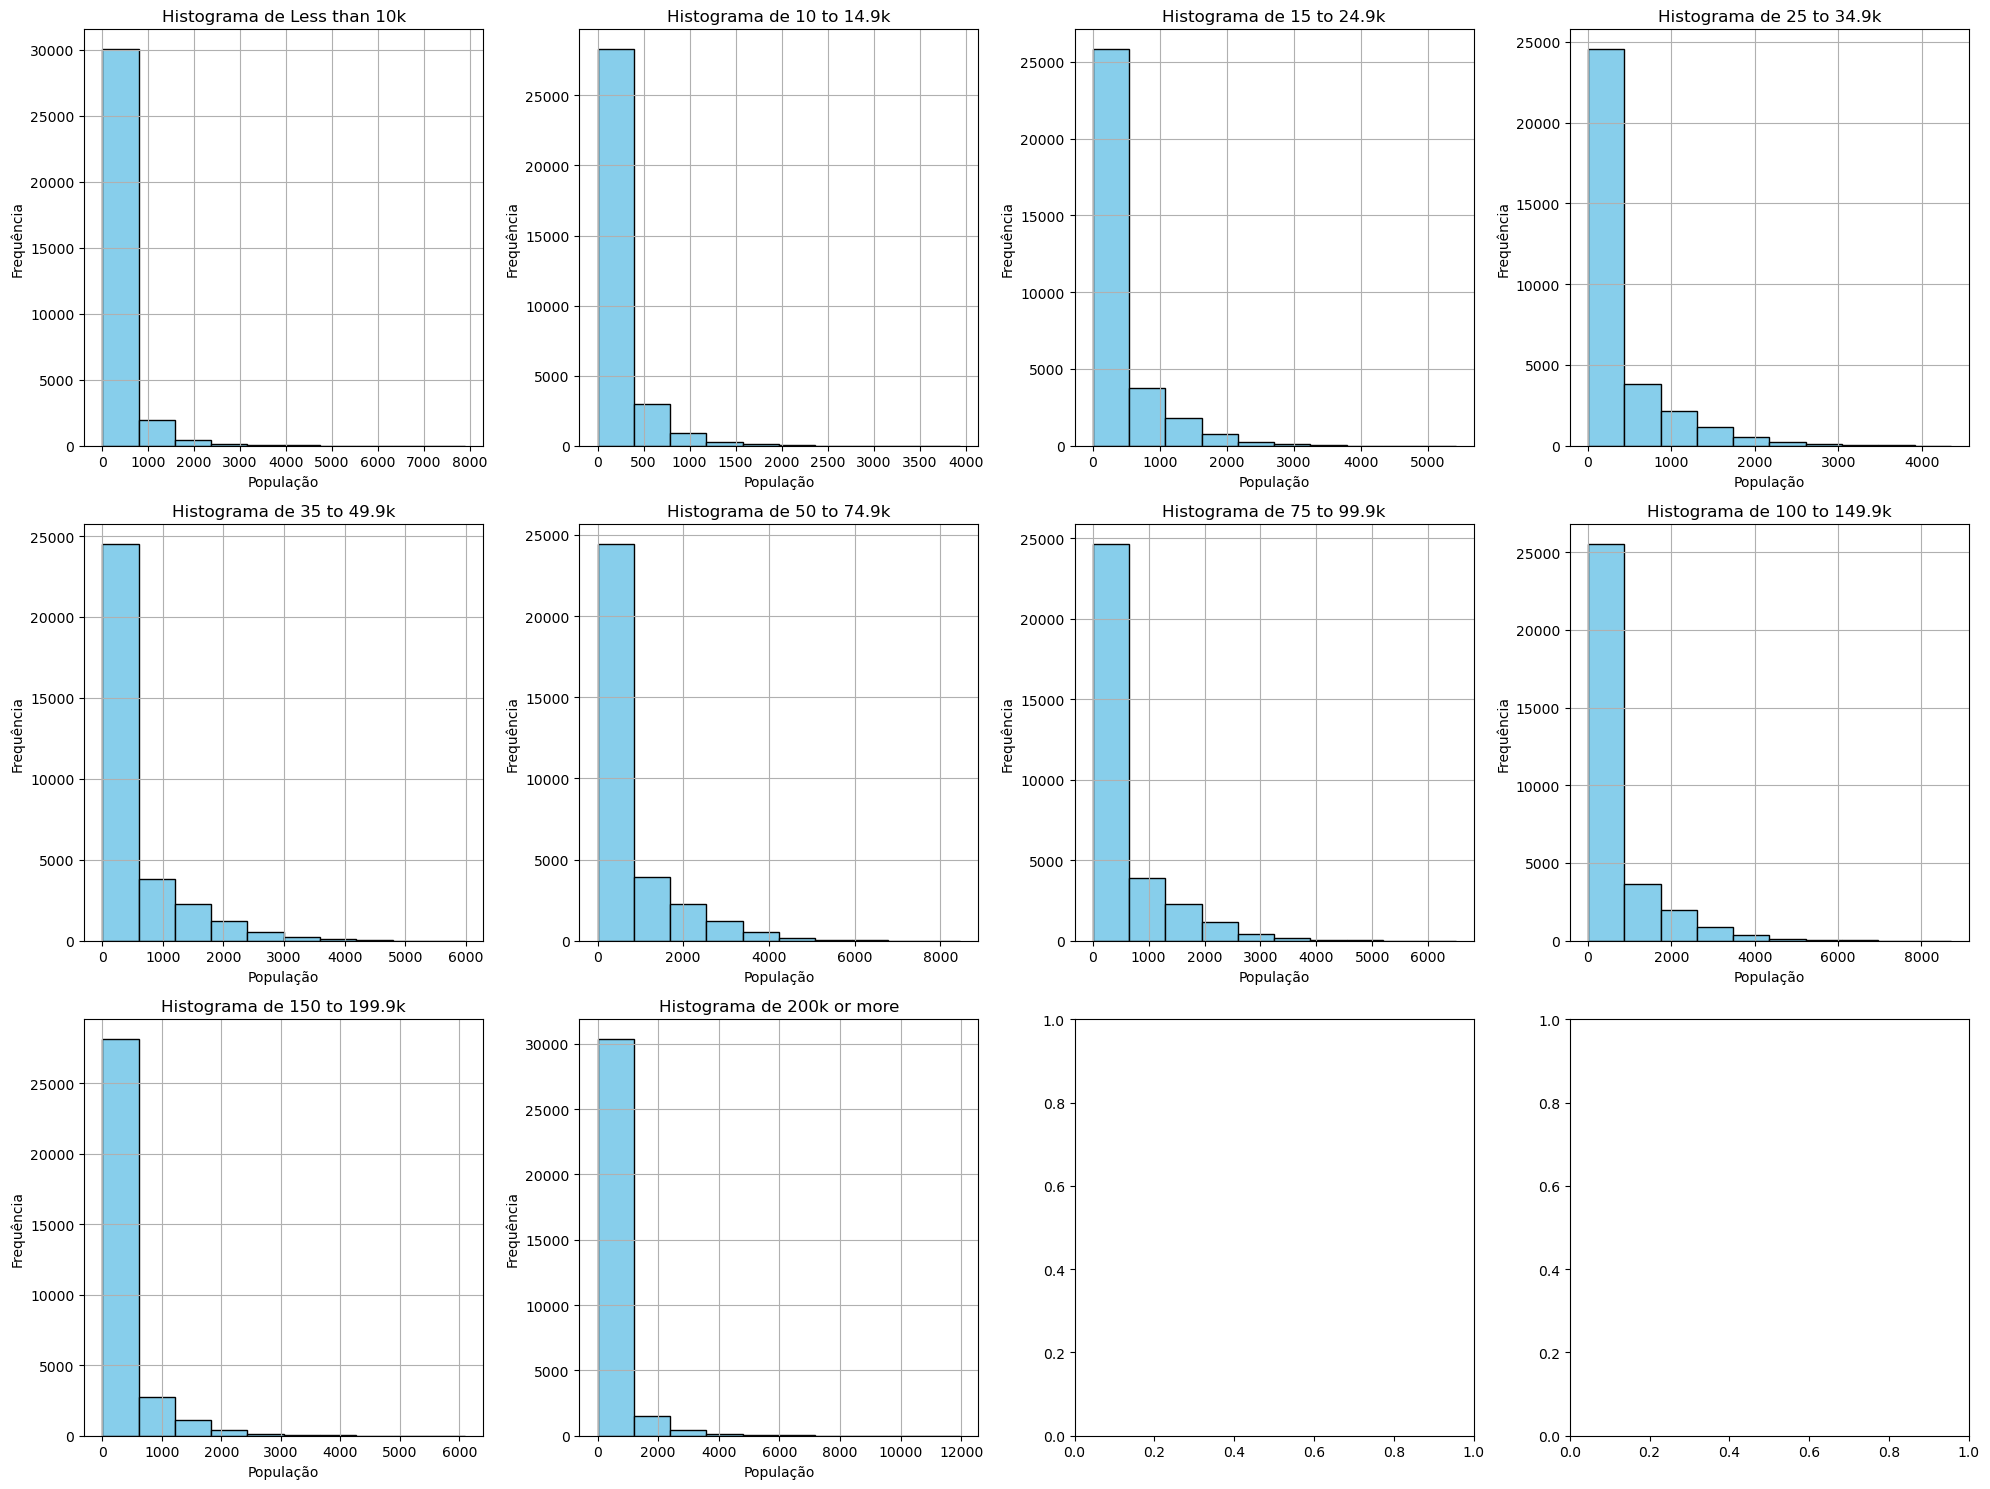

In [14]:
utils.histogram(df[household_columns])

## DESENVOLVIMENTO DA HIPÓTESE

In [15]:
df['Idade de 25 a 64 anos'] = df['25 to 34'] + df['35 to 44'] + df['45 to 54'] + df['55 to 59'] + df['60 to 64']
df['Renda de 10 a 49.9k'] = df['Less than 10k'] + df['10 to 14.9k'] + df['15 to 24.9k'] + df['25 to 34.9k'] + df['35 to 49.9k']
df['Renda de 50 a acima de 200k'] = df['50 to 74.9k'] + df['75 to 99.9k'] + df['100 to 149.9k'] + df['150 to 199.9k'] + df['200k or more']

In [16]:
df_temp = df[['GeographicAreaName', 'MedianAgeInYears', 'Idade de 25 a 64 anos', 'Renda de 10 a 49.9k', 'Renda de 50 a acima de 200k', 'isLab', 'TotalPopulation']]
df_temp = df_temp.sort_values(by='Idade de 25 a 64 anos', ascending=False)
df_temp.head(3)

,GeographicAreaName,MedianAgeInYears,Idade de 25 a 64 anos,Renda de 10 a 49.9k,Renda de 50 a acima de 200k,isLab,TotalPopulation
27911,ZCTA5 77449,31.7,68827,10368,26760,False,128294
18824,ZCTA5 11385,35.2,62645,11583,23918,False,107796
27946,ZCTA5 77494,35.2,62351,5070,31505,False,118291


In [18]:
df_temp = df_temp[df_temp['isLab'] == True]
df_temp.head(3)

,GeographicAreaName,MedianAgeInYears,Idade de 25 a 64 anos,Renda de 10 a 49.9k,Renda de 50 a acima de 200k,isLab,TotalPopulation
2876,ZCTA5 94565,34.1,52644,9551,18817,True,97671
30311,ZCTA5 98052,34.8,42857,4679,23343,True,70245
3370,ZCTA5 95823,31.4,40435,12410,11300,True,79440
